In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("house_prices.csv")


In [3]:
# Create Classification Target
# -----------------------------------
# Define Expensive (1) vs Affordable (0) based on median SalePrice
median_price = df["SalePrice"].median()
df["PriceCategory"] = np.where(df["SalePrice"] > median_price, 1, 0)

In [4]:
# Select Features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']
X = df[features]
y = df["PriceCategory"]

In [ ]:
# 2 Split Train/Test
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 3 Train Logistic Regression
# -----------------------------------
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [ ]:
# 4 Train Random Forest
# -----------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [9]:
 #Evaluate Both Models
# -----------------------------------
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)

In [10]:
print("=== Model Comparison ===")
print(f"Logistic Regression Accuracy: {log_acc:.3f}")
print(f"Random Forest Accuracy:      {rf_acc:.3f}\n")

=== Model Comparison ===
Logistic Regression Accuracy: 1.000
Random Forest Accuracy:      1.000



In [11]:
# 6 Classification Reports
# -----------------------------------
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))

print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



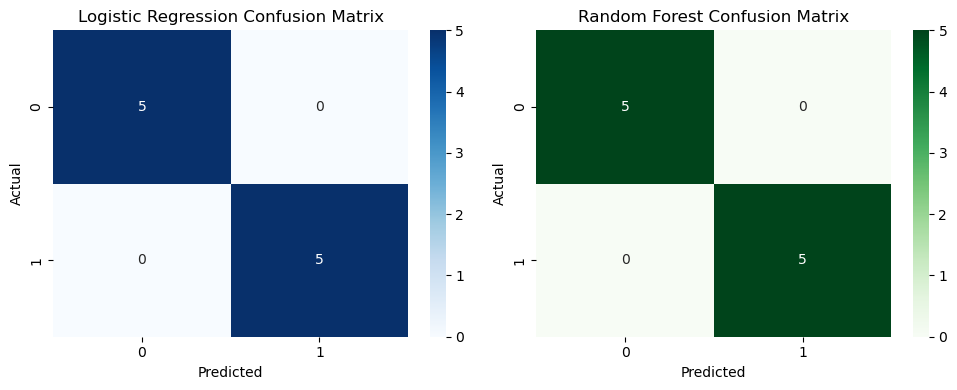

In [12]:
# 7 Confusion Matrices
# -----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [13]:
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("=== Random Forest Feature Importance ===")
print(feature_importance)


=== Random Forest Feature Importance ===
       Feature  Importance
1    GrLivArea    0.302973
3  TotalBsmtSF    0.222886
4    YearBuilt    0.199134
2   GarageCars    0.111480
5      LotArea    0.098804
0  OverallQual    0.064722


In [14]:
# ✅ Summary
# -----------------------------------
print("""
✅ Week 6 Completed
- Converted regression dataset into classification
- Built Logistic Regression and Random Forest models
- Compared accuracy
- Visualized confusion matrices
- Identified key features affecting expensive houses
""")


✅ Week 6 Completed
- Converted regression dataset into classification
- Built Logistic Regression and Random Forest models
- Compared accuracy
- Visualized confusion matrices
- Identified key features affecting expensive houses

